In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
shelters = pd.read_csv('./datasets/cleaned_data/shelters_with_stats.csv')

# Info

In [4]:
shelters.head(2)

,id,name,date_in,location,intake_type,condition,age_in,breed,color,date_out,...,breed_2,pure,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,time_in_shelter
0,A047759,Oreo,2014-04-02 15:55:00,Austin (TX),surrender,normal,10.0,dachshund,Tricolor,2014-04-07 15:12:00,...,dachshund,1.0,0.50,26.0,40.0,7.000000,10.000000,16.000000,32.000000,4 days 23:17:00
1,A134067,Bandit,2013-11-16 09:02:00,12034 Research Blvd in Austin (TX),public_assist,injured,16.0,shetland sheepdog,Brown/White,2013-11-16 11:54:00,...,shetland sheepdog,1.0,0.95,1.0,4.0,17.941176,20.908497,42.934641,57.522876,0 days 02:52:00


In [5]:
shelters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53513 entries, 0 to 53512
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  53513 non-null  object 
 1   name                53513 non-null  object 
 2   date_in             53513 non-null  object 
 3   location            53513 non-null  object 
 4   intake_type         53512 non-null  object 
 5   condition           53504 non-null  object 
 6   age_in              53513 non-null  float64
 7   breed               53513 non-null  object 
 8   color               53513 non-null  object 
 9   date_out            53513 non-null  object 
 10  dob                 53513 non-null  object 
 11  outcome             53513 non-null  object 
 12  age_out             53513 non-null  float64
 13  sex                 53513 non-null  int64  
 14  intact_in           53513 non-null  int64  
 15  intact_out          53513 non-null  int64  
 16  age 

In [28]:
shelters.describe()

,age_in,age_out,sex,intact_in,intact_out,pure,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,time_in_shelter
count,53513.000000,53513.000000,53513.000000,53513.000000,53513.000000,53513.000000,52803.000000,52803.000000,52803.000000,52803.000000,52803.000000,52803.000000,52803.000000,53513.000000
mean,2.502289,2.534730,0.528806,0.740287,0.272756,0.833013,0.635164,21.319322,35.886086,15.981590,18.877645,38.365932,51.027293,16.428924
std,3.159688,3.177063,0.499174,0.438481,0.445381,0.372968,0.260489,19.523098,29.672227,6.120092,6.499372,25.565203,32.422292,46.246018
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,1.000000,4.000000,6.000000,8.000000,2.000000,5.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,1.000000,4.000000,10.000000,13.000000,16.000000,20.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.700000,16.000000,25.000000,17.000000,19.954248,40.000000,50.000000,5.000000
75%,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.950000,33.500000,52.500000,21.000000,24.000000,55.000000,80.000000,11.000000
max,24.000000,24.000000,1.000000,1.000000,1.000000,1.000000,0.950000,81.000000,100.000000,48.000000,66.000000,175.000000,190.000000,1912.000000


In [6]:
shelters.columns

Index(['id', 'name', 'date_in', 'location', 'intake_type', 'condition',
       'age_in', 'breed', 'color', 'date_out', 'dob', 'outcome', 'age_out',
       'sex', 'intact_in', 'intact_out', 'age', 'primary_color',
       'secondary_color', 'breed_1', 'breed_2', 'pure', 'obey', 'reps_lower',
       'reps_upper', 'height_low_inches', 'height_high_inches',
       'weight_low_lbs', 'weight_high_lbs', 'time_in_shelter'],
      dtype='object')

# Small Changes

In [7]:
shelters['time_in_shelter'] = pd.to_timedelta(shelters['time_in_shelter'])
shelters['time_in_shelter'] = shelters['time_in_shelter'].dt.days

# Exploring the Data

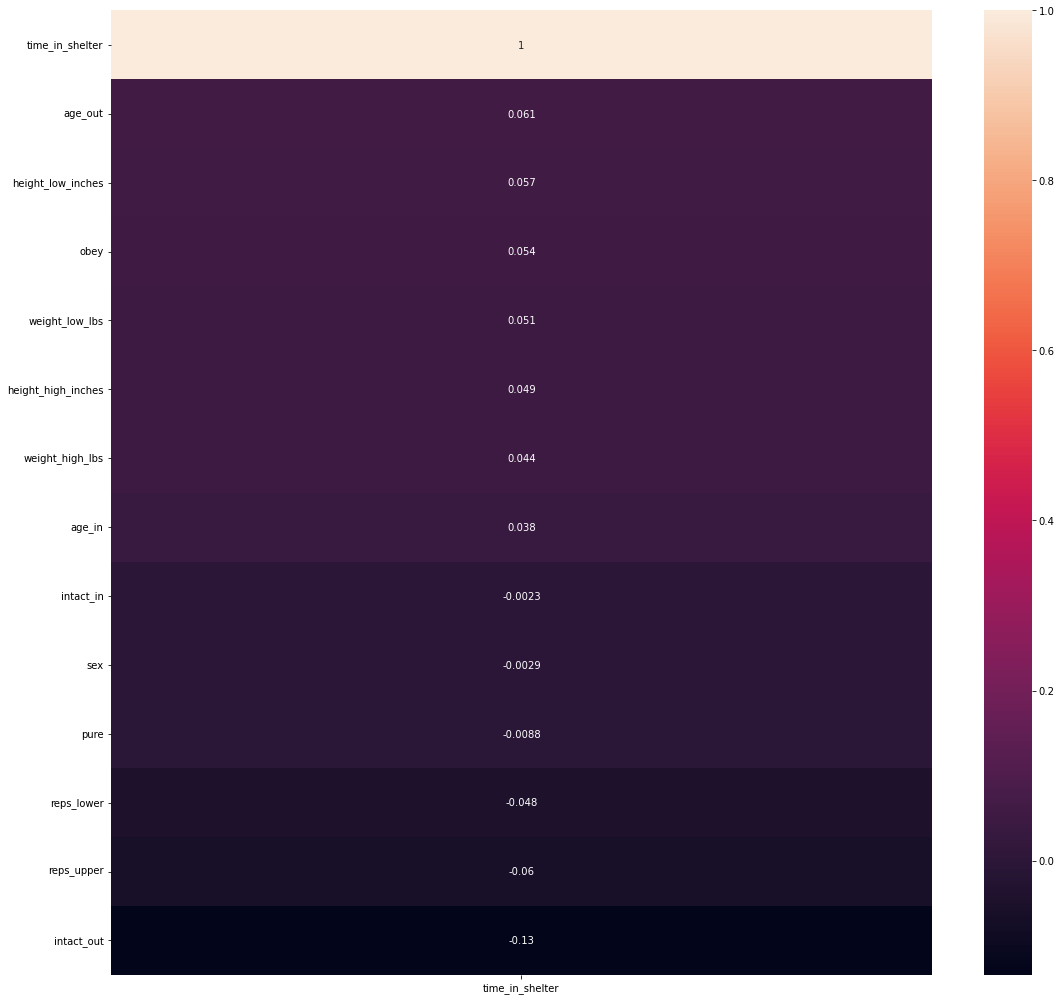

In [8]:
plt.figure(figsize=(16,14))
sns.heatmap(
    shelters.corr()[['time_in_shelter']].sort_values(by='time_in_shelter', ascending=False),
    annot=True,
)

plt.tight_layout();

In [9]:
shelters['location'].value_counts().head(20)

Austin (TX)                              8934
Travis (TX)                              1188
Outside Jurisdiction                      406
7201 Levander Loop in Austin (TX)         381
Manor (TX)                                322
Del Valle (TX)                            259
Pflugerville (TX)                         235
4434 Frontier Trail in Austin (TX)        116
4434 Frontier Trl in Austin (TX)           97
124 West Anderson Lane in Austin (TX)      72
124 W Anderson Ln in Austin (TX)           69
12034 Research Blvd in Austin (TX)         61
Leander (TX)                               60
1156 W Cesar Chavez in Austin (TX)         56
12034 Research in Austin (TX)              44
4434 Frontier in Austin (TX)               40
Lago Vista (TX)                            33
5701 Johnny Morris Rd in Austin (TX)       30
1430 Frontier Valley in Austin (TX)        29
1156 W Cesar Chavez St in Austin (TX)      29
Name: location, dtype: int64

# Breeds

### Breed 1

In [12]:
breed_1 = shelters['breed_1'].value_counts().head(20)                               # top 20 breeds for breed_1
breed_1 = pd.DataFrame(breed_1).reset_index()                                       # create data frame and reset index
breed_1.rename(columns={'index': 'breed_1', 'breed_1': 'count'}, inplace=True)      # rename columns
breed_1.head()

,breed_1,count
0,labrador retriever,7882
1,chihuahua,7744
2,pit bull,7119
3,german shepherd,3730
4,australian cattle dog,2356


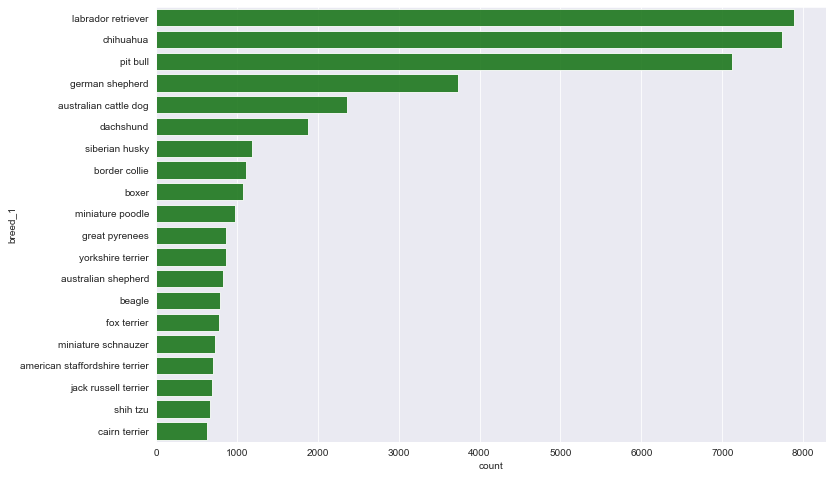

In [13]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')

sns.barplot(
    data=breed_1, 
    orient='h', 
    x='count', 
    y='breed_1',
    ci=None,
    color='green',
    alpha=.85
);

### Breed 2

In [14]:
breed_2 = shelters['breed_2'].value_counts().head(20)                               # top 20 breeds for breed_2
breed_2 = pd.DataFrame(breed_2).reset_index()                                       # create data frame and reset index
breed_2.rename(columns={'index': 'breed_2', 'breed_2': 'count'}, inplace=True)      # rename columns
breed_2.head()

,breed_2,count
0,chihuahua,7658
1,labrador retriever,7475
2,pit bull,7207
3,german shepherd,3644
4,australian cattle dog,2371


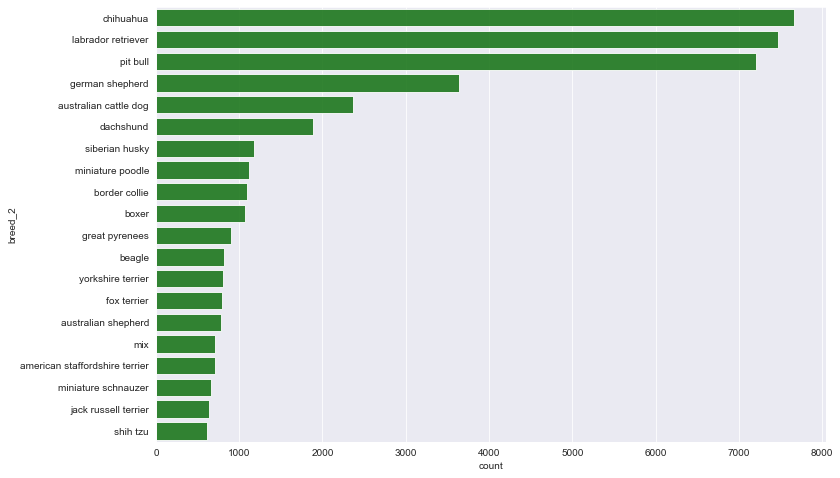

In [15]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')

sns.barplot(
    data=breed_2, 
    orient='h', 
    x='count', 
    y='breed_2',
    ci=None,
    color='green',
    alpha=.85
);

In [16]:
# breed_1 groupby
# looking at time_in_shelter and amount of dogs per breed
breed_gby = shelters.groupby(['breed_1']).agg(['mean','size'])
breed_gby = breed_gby.sort_values(by=('time_in_shelter','size'), ascending=False)
breed_gby.head(20)

age_in         age_out             sex  \
                                    mean  size      mean  size      mean   
breed_1                                                                    
labrador retriever              2.011545  7882  2.046562  7882  0.517635   
chihuahua                       2.852660  7744  2.881069  7744  0.521178   
pit bull                        2.206771  7119  2.247928  7119  0.528726   
german shepherd                 1.952547  3730  1.980697  3730  0.521716   
australian cattle dog           2.025467  2356  2.055603  2356  0.463073   
dachshund                       2.790512  1876  2.822495  1876  0.551173   
siberian husky                  2.042230  1184  2.062500  1184  0.521959   
border collie                   2.247756  1114  2.279174  1114  0.460503   
boxer                           2.539106  1074  2.584730  1074  0.499069   
miniature poodle                3.977482   977  4.004094   977  0.577277   
great pyrenees                  1.573072   869  1.594937   869  0.578826   
yorkshire terrier               3.248848   868  3.277650   868  0.531106   
australian shepherd             2.362214   831  2.385078   831  0.495788   
beagle                          2.971069   795  2.997484   795  0.504403   
fox terrier                     3.338462   780  3.367949   780  0.534615   
miniature schnauzer             3.443526   726  3.487603   726  0.568871   
american staffordshire terrier  2.238231   701  2.296719   701  0.489301   
jack russell terrier            2.431851   697  2.456241   697  0.569584   
shih tzu                        4.098802   668  4.125749   668  0.553892   
cairn terrier                   2.025397   630  2.050794   630  0.538095   

                                     intact_in       intact_out        ...  \
                                size      mean  size       mean  size  ...   
breed_1                                                                ...   
labrador retriever              7882  0.739660  7882   0.246384  7882  ...   
chihuahua                       7744  0.770532  7744   0.268208  7744  ...   
pit bull                        7119  0.780587  7119   0.339795  7119  ...   
german shepherd                 3730  0.776408  3730   0.276408  3730  ...   
australian cattle dog           2356  0.745331  2356   0.212649  2356  ...   
dachshund                       1876  0.726546  1876   0.207356  1876  ...   
siberian husky                  1184  0.768581  1184   0.333615  1184  ...   
border collie                   1114  0.701975  1114   0.201077  1114  ...   
boxer                           1074  0.696462  1074   0.276536  1074  ...   
miniature poodle                 977  0.670420   977   0.257932   977  ...   
great pyrenees                   869  0.848101   869   0.387802   869  ...   
yorkshire terrier                868  0.726959   868   0.339862   868  ...   
australian shepherd              831  0.699158   831   0.243081   831  ...   
beagle                           795  0.666667   795   0.230189   795  ...   
fox terrier                      780  0.696154   780   0.226923   780  ...   
miniature schnauzer              726  0.685950   726   0.241047   726  ...   
american staffordshire terrier   701  0.773181   701   0.261056   701  ...   
jack russell terrier             697  0.714491   697   0.195122   697  ...   
shih tzu                         668  0.663174   668   0.507485   668  ...   
cairn terrier                    630  0.792063   630   0.238095   630  ...   

                               height_low_inches       height_high_inches  \
                                            mean  size               mean   
breed_1                                                                     
labrador retriever                     20.869538  7882          23.884350   
chihuahua                               6.273766  7744           9.243922   
pit bull                               17.077111  7119          19.109216   
german shepherd             

# Intake Type

In [27]:
shelters['intake_type'].value_counts()

stray            39547
surrender         9237
public_assist     4310
abandoned          250
euth_request       168
Name: intake_type, dtype: int64

In [17]:
intake_gby = shelters.groupby(by='intake_type').mean()
intake_gby.sort_values(by='time_in_shelter')

,age_in,age_out,sex,intact_in,intact_out,pure,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,time_in_shelter
intake_type,,,,,,,,,,,,,,
euth_request,8.202381,8.202381,0.571429,0.422619,0.398810,0.839286,0.687796,18.242021,30.306608,16.786765,19.809561,42.255958,54.903555,3.309524
public_assist,3.532483,3.561717,0.583527,0.555452,0.344548,0.854988,0.633160,21.531626,35.722647,15.976351,18.759529,38.589077,50.564495,14.021578
stray,2.323918,2.356664,0.530761,0.788581,0.272663,0.840822,0.636758,21.189463,35.736603,16.037667,18.949979,38.498684,51.223754,15.738109
abandoned,1.284000,1.320000,0.496000,0.884000,0.340000,0.784000,0.676520,17.822738,30.880946,17.434601,20.380427,43.202628,57.326133,15.888000
surrender,2.713543,2.746671,0.494966,0.621739,0.235574,0.790516,0.627176,21.928161,36.842166,15.689541,18.565229,37.490178,50.159548,20.764859


# Condition

In [18]:
shelters['condition'].value_counts()

normal      47197
injured      2811
sick         1676
nursing      1166
aged          329
other         108
medical        89
pregnant       63
neonatal       44
behavior       21
Name: condition, dtype: int64

In [19]:
condition_gby = shelters.groupby(by='condition').mean()
condition_gby.sort_values(by='time_in_shelter')

,age_in,age_out,sex,intact_in,intact_out,pure,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,time_in_shelter
condition,,,,,,,,,,,,,,
sick,2.632458,2.665871,0.514320,0.838902,0.628282,0.888425,0.620072,22.035561,37.726197,15.527946,18.363700,37.067966,48.780699,13.470167
aged,11.984802,12.021277,0.537994,0.316109,0.264438,0.896657,0.603291,24.031556,40.372471,14.897329,17.849663,33.739023,45.342415,15.012158
neonatal,0.045455,0.045455,0.500000,1.000000,0.772727,0.772727,0.659091,18.250000,32.545455,15.625000,18.238636,34.465909,46.625000,15.636364
normal,2.441342,2.473420,0.527936,0.731424,0.241032,0.828485,0.634978,21.361487,35.883557,16.012016,18.912667,38.475437,51.204572,15.749645
medical,2.955056,3.011236,0.561798,0.865169,0.426966,0.820225,0.621567,22.973225,37.787632,16.902512,19.642983,41.862965,55.551333,19.483146
injured,3.262896,3.313056,0.555674,0.763429,0.431163,0.876556,0.620079,22.110956,37.607783,15.505263,18.372460,36.580850,48.552554,24.373888
nursing,0.211835,0.214408,0.538593,0.988851,0.601201,0.813894,0.711564,15.762795,27.797344,16.818075,19.716861,41.542373,54.854255,26.389365
pregnant,2.015873,2.015873,0.190476,0.968254,0.634921,0.809524,0.591585,23.886018,38.905212,15.398693,18.038178,34.310717,45.823789,30.396825
other,4.129630,4.166667,0.490741,0.712963,0.379630,0.870370,0.637469,21.531003,36.001486,15.257703,17.888702,35.447712,46.680205,34.407407


# Time in Shelter

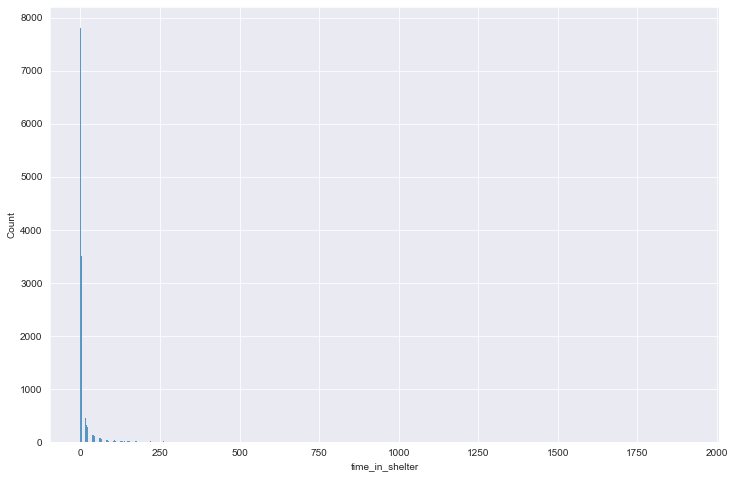

In [44]:
plt.figure(figsize=(12,8))
sns.histplot(shelters['time_in_shelter']);

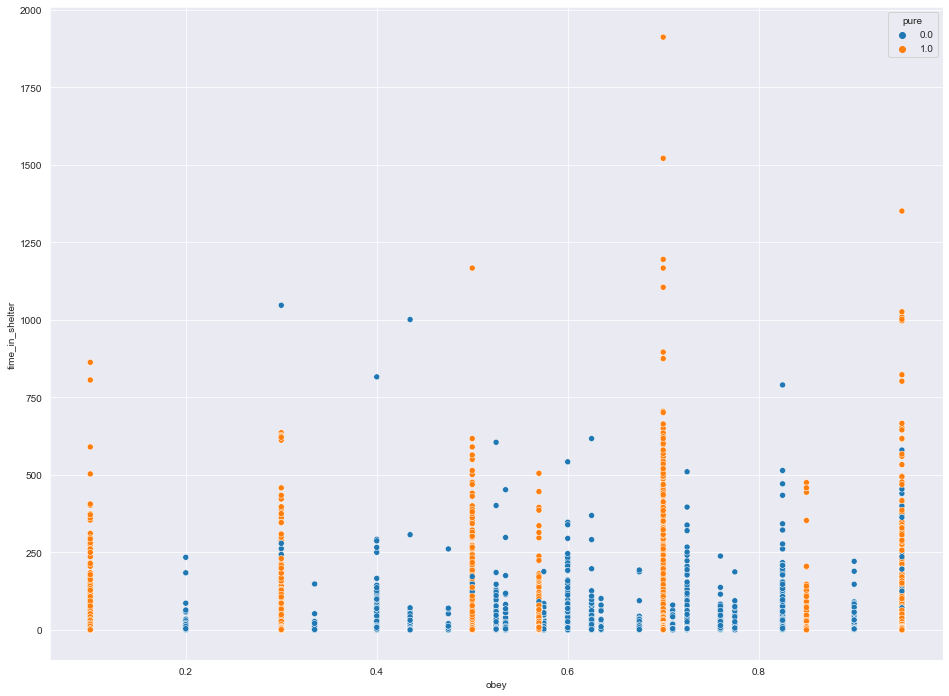

In [20]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=shelters, x='obey', y='time_in_shelter', hue='pure');

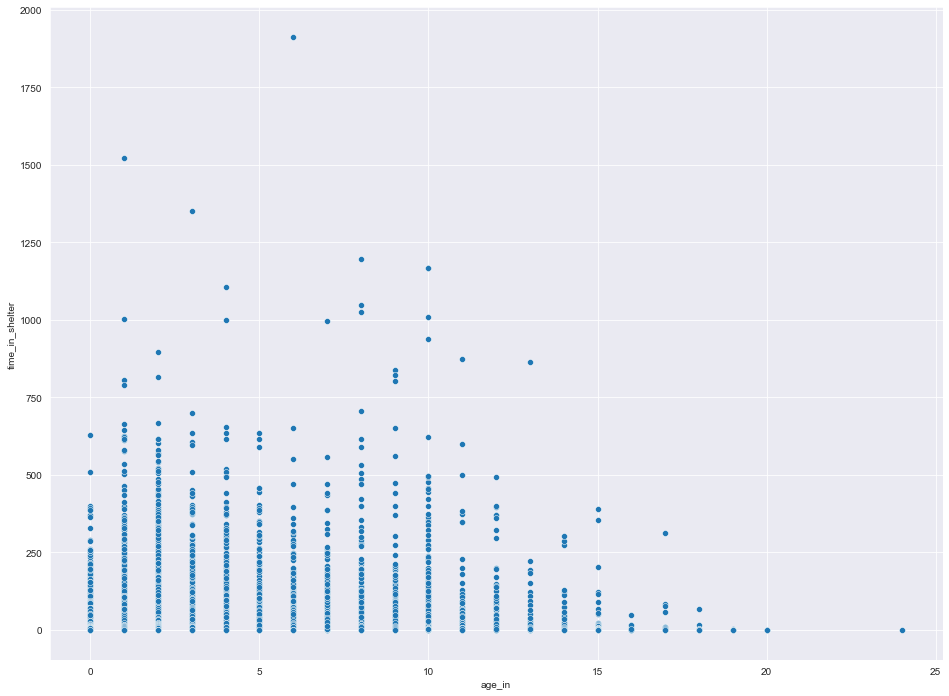

In [21]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=shelters, x='age_in', y='time_in_shelter');

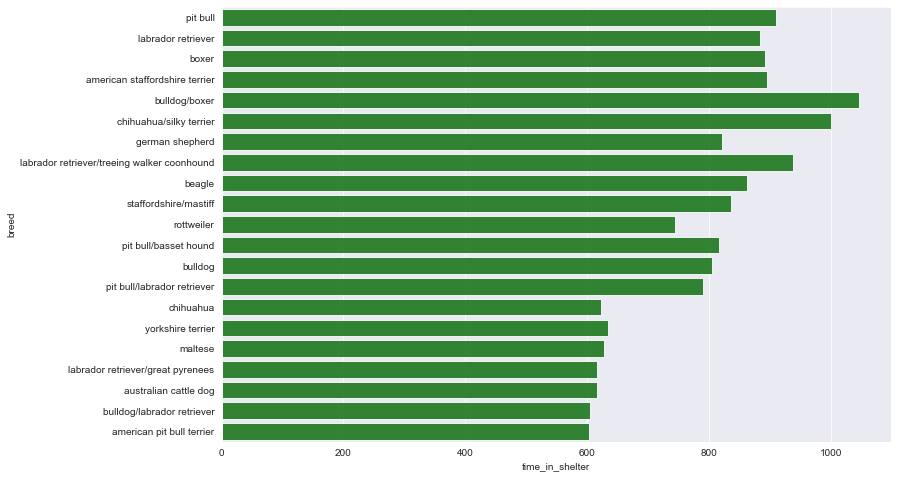

In [22]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')

sns.barplot(
    data=shelters.sort_values(by='time_in_shelter', ascending=False).head(50), 
    orient='h', 
    x='time_in_shelter', 
    y='breed',
    ci=None,
    color='green',
    alpha=.85
);

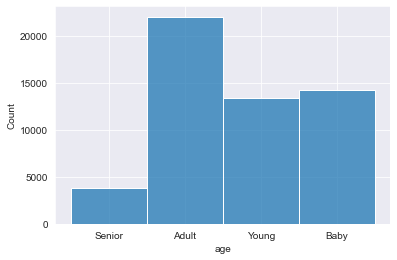

In [23]:
sns.histplot(shelters['age']);

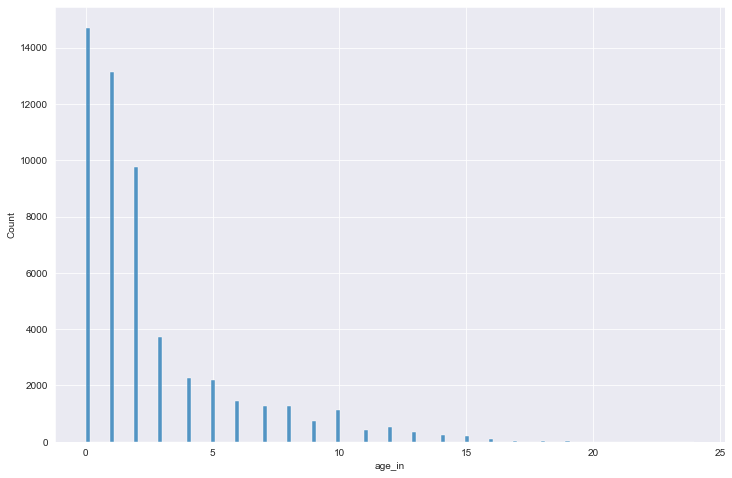

In [24]:
plt.figure(figsize=(12,8))
sns.histplot(shelters['age_in']);

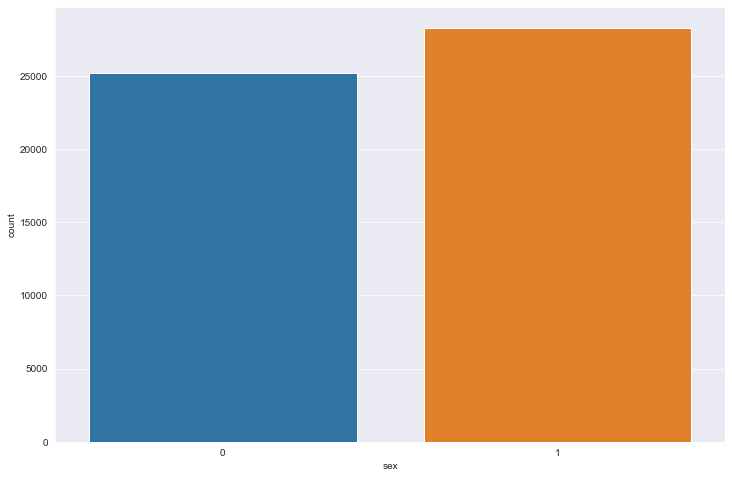

In [25]:
plt.figure(figsize=(12,8))
sns.countplot(data=shelters, x='sex');

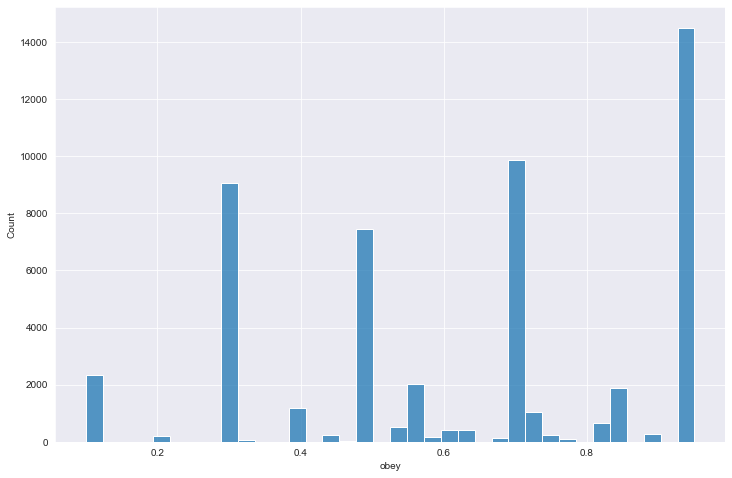

In [26]:
plt.figure(figsize=(12,8))
sns.histplot(shelters['obey']);